JASON STOPAS<br>
ASSIGNMENT 2

In [1]:
import gdown
import polars as pl
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
import plotly.graph_objects as go
import duckdb
import os

In [2]:
drive_loc = 'https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ'

download_LC = 'downloaded_file.csv'
gdown.download(drive_loc, download_LC, quiet=False)

Jobs = pl.read_csv(download_LC)

Downloading...
From (original): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ
From (redirected): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ&confirm=t&uuid=b30187d9-5a5e-4c6b-86cf-64e773acd6a4
To: C:\Users\jtsto\OneDrive\Documents\03 BU SPRING 2025\AD 688\Assignment_2\downloaded_file.csv
100%|██████████| 717M/717M [01:13<00:00, 9.71MB/s] 


In [3]:
print(Jobs.columns)
Jobs.select(Jobs.columns).head(3)

['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,ACTIVE_URLS,ACTIVE_SOURCES_INFO,TITLE_RAW,BODY,MODELED_EXPIRED,MODELED_DURATION,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,MAX_EDULEVELS,MAX_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,IS_INTERNSHIP,SALARY,REMOTE_TYPE,REMOTE_TYPE_NAME,ORIGINAL_PAY_PERIOD,SALARY_TO,SALARY_FROM,…,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,SOC_2,SOC_2_NAME,SOC_3,SOC_3_NAME,SOC_4,SOC_4_NAME,SOC_5,SOC_5_NAME,LIGHTCAST_SECTORS,LIGHTCAST_SECTORS_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
str,str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,i64,i64,str,str,bool,str,str,i64,str,i64,str,i64,str,i64,i64,bool,i64,i64,str,str,i64,i64,…,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str
"""1f57d95acf4dc67ed2819eb12f049f…","""9/6/2024""","""2024-09-06 20:32:57.352 Z""",0,"""6/2/2024""","""6/8/2024""",6,"""[ ""Company"" ]""","""[ ""brassring.com"" ]""","""[ ""https://sjobs.brassring.c…","""[]""",null,"""Enterprise Analyst (II-III)""","""31-May-2024 Enterprise Analys…","""6/8/2024""",6,894731,"""Murphy USA""","""Murphy USA""",false,"""[ 2 ]""","""[ ""Bachelor's degree"" ]""",2,"""Bachelor's degree""",null,null,1,"""Full-time (> 32 hours)""",2,2,false,null,0,"""[None]""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101011,"""General ERP Analyst / Consulta…",2310,"""Business Intelligence""",23101011,"""General ERP Analyst / Consulta…",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""","""[ 7 ]""","""[ ""Artificial Intelligence"" …",44,"""Retail Trade""",441,"""Motor Vehicle and Parts Dealer…",4413,"""Automotive Parts, Accessories,…",44133,"""Automotive Parts and Accessori…",441330,"""Automotive Parts and Accessori…"
"""0cb072af26757b6c4ea9464472a50a…","""8/2/2024""","""2024-08-02 17:08:58.838 Z""",0,"""6/2/2024""","""8/1/2024""",null,"""[ ""Job Board"" ]""","""[ ""maine.gov"" ]""","""[ ""https://joblink.maine.gov…","""[]""",null,"""Oracle Consultant - Reports (3…","""Oracle Consultant - Reports (3…","""8/1/2024""",null,133098,"""Smx Corporation Limited""","""SMX""",true,"""[ 99 ]""","""[ ""No Education Listed"" ]""",99,"""No Education Listed""",null,null,1,"""Full-time (> 32 hours)""",3,3,false,null,1,"""Remote""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101012,"""Oracle Consultant / Analyst""",2310,"""Business Intelligence""",23101012,"""Oracle Consultant / Analyst""",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""",null,null,56,"""Administrative and Support and…",561,"""Administrative and Support Ser…",5613,"""Employment Services""",56132,"""Temporary Help Services""",561320,"""Temporary Help Services"""
"""85318b12b3331fa490d32ad014379d…","""9

*__SQL connection__*

In [39]:
con = duckdb.connect(database=':memory:')

*__create dimensional table 1__*

In [40]:
companies = Jobs.select([
    "COMPANY", 
    "COMPANY_NAME", 
    "COMPANY_RAW", 
    "COMPANY_IS_STAFFING"
]).unique().with_row_index(name="COMPANY_ID")

In [41]:
Jobs_db = Jobs.join(
    companies, 
    on=["COMPANY", "COMPANY_NAME", "COMPANY_RAW", "COMPANY_IS_STAFFING"], 
    how="left"
)

In [42]:
con.register("Jobs_db", Jobs_db.to_pandas())

*__create dimensional table 2__*

In [43]:
industries = Jobs.select([
    "NAICS_2022_6",
    "NAICS_2022_6_NAME",
    "SOC_5",
    "SOC_5_NAME",
    "LOT_SPECIALIZED_OCCUPATION_NAME",
    "LOT_OCCUPATION_GROUP"
]).unique().with_row_index(name="INDUSTRY_ID")

In [44]:
Jobs_db = Jobs_db.join(
    industries, 
    on=[
        "NAICS_2022_6",
        "NAICS_2022_6_NAME",
        "SOC_5",
        "SOC_5_NAME",
        "LOT_SPECIALIZED_OCCUPATION_NAME",
        "LOT_OCCUPATION_GROUP"
    ], 
    how="left"
)

In [45]:
con.register("industries", industries.to_pandas())
con.register("Jobs_db", Jobs_db.to_pandas())

*__create dimensional table 3__*

In [46]:
locations = Jobs.select([
    "LOCATION",
    "CITY_NAME",
    "STATE_NAME",
    "COUNTY_NAME",
    "MSA",
    "MSA_NAME"
]).unique().with_row_index(name="LOCATION_ID")

In [47]:
Jobs_db = Jobs_db.join(
    locations,
    on=[
        "LOCATION",
        "CITY_NAME",
        "STATE_NAME",
        "COUNTY_NAME",
        "MSA",
        "MSA_NAME"
    ],
    how="left"
)

In [48]:
con.register("locations", locations.to_pandas())
con.register("Jobs_db", Jobs_db.to_pandas())

*__create the primary fact table__*

In [49]:
job_postings = Jobs_db.select([
    "ID",
    "TITLE_CLEAN",
    "COMPANY_ID",
    "INDUSTRY_ID",
    "EMPLOYMENT_TYPE_NAME",
    "REMOTE_TYPE_NAME",
    "BODY",
    "MIN_YEARS_EXPERIENCE",
    "MAX_YEARS_EXPERIENCE",
    "SALARY",
    "SALARY_FROM",
    "SALARY_TO",
    "LOCATION_ID",
    "POSTED",
    "EXPIRED",
    "DURATION"
])

In [50]:
con.register("job_postings", job_postings.to_pandas())

*__save tables__*

In [51]:
os.makedirs("tables", exist_ok=True)

In [52]:
job_postings.write_csv("tables/job_postings.csv")
companies.write_csv("tables/companies.csv")
industries.write_csv("tables/industries.csv")
locations.write_csv("tables/locations.csv")

*__looking at NAICS_2022_6__*

In [53]:
query_occupations = """
SELECT 
    LOT_SPECIALIZED_OCCUPATION_NAME,
    COUNT(*) AS posting_count
FROM job_postings j
JOIN industries i ON j.INDUSTRY_ID = i.INDUSTRY_ID
WHERE i.NAICS_2022_6 = '518210'
GROUP BY LOT_SPECIALIZED_OCCUPATION_NAME
ORDER BY posting_count DESC
"""
df_occupations = con.execute(query_occupations).df()
df_occupations

,LOT_SPECIALIZED_OCCUPATION_NAME,posting_count
0,Data Analyst,430
1,Enterprise Architect,158
2,General ERP Analyst / Consultant,125
3,SAP Analyst / Admin,80
4,Oracle Consultant / Analyst,48
5,Business Intelligence Analyst,32
6,Business Analyst (General),27
7,Data Quality Analyst,10
8,Financial Data Analyst,7
9,Marketing Analyst,5


*__query 1__*

In [54]:
query_01 = """
SELECT 
    i.NAICS_2022_6_NAME AS industry_name,
    i.LOT_SPECIALIZED_OCCUPATION_NAME AS specialized_occupation,
    median(j.SALARY) AS median_salary,
    COUNT(*) AS posting_count
FROM job_postings j
JOIN industries i ON j.INDUSTRY_ID = i.INDUSTRY_ID
WHERE i.NAICS_2022_6 = '518210'
  AND j.SALARY IS NOT NULL
  AND j.SALARY > 0
GROUP BY industry_name, specialized_occupation
ORDER BY median_salary DESC
"""
df_salary = con.execute(query_01).df()

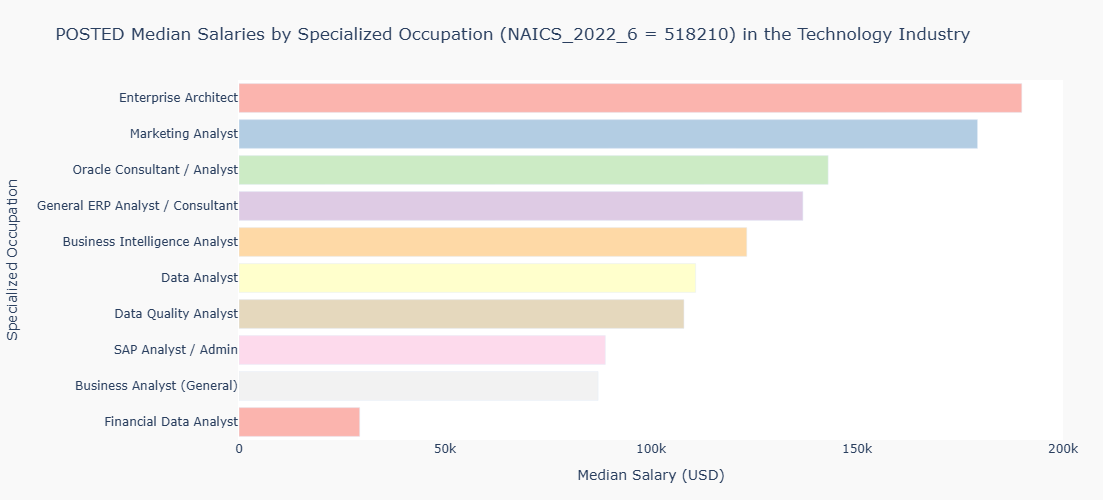

In [55]:
fig_01 = px.bar(
    df_salary,
    y="specialized_occupation",
    x="median_salary",
    color="specialized_occupation",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="POSTED Median Salaries by Specialized Occupation (NAICS_2022_6 = 518210) in the Technology Industry",
    labels={
        "specialized_occupation": "Specialized Occupation",
        "median_salary": "Median Salary (USD)",
        "posting_count": "Job Postings"
    },
    hover_data=["median_salary", "posting_count"],
    height=500,
    orientation="h"
)

fig_01.update_layout(
    showlegend=False,
    yaxis_title="Specialized Occupation",
    xaxis_title="Median Salary (USD)",
    margin=dict(l=160, r=40, t=80, b=60),
    paper_bgcolor="#F9F9F9", 
    plot_bgcolor="#FFFFFF"  
)

fig_01.show()

*__query 2__*

In [56]:
query_02 = """
SELECT 
    c.COMPANY_NAME AS company_name,
    COUNT(*) AS remote_jobs
FROM job_postings j
JOIN companies c ON j.COMPANY_ID = c.COMPANY_ID
JOIN locations l ON j.LOCATION_ID = l.LOCATION_ID
WHERE j.REMOTE_TYPE_NAME = 'Remote'
  AND l.STATE_NAME = 'California'
GROUP BY company_name
ORDER BY remote_jobs DESC
LIMIT 7
"""
df_remote_ca = con.execute(query_02).df()

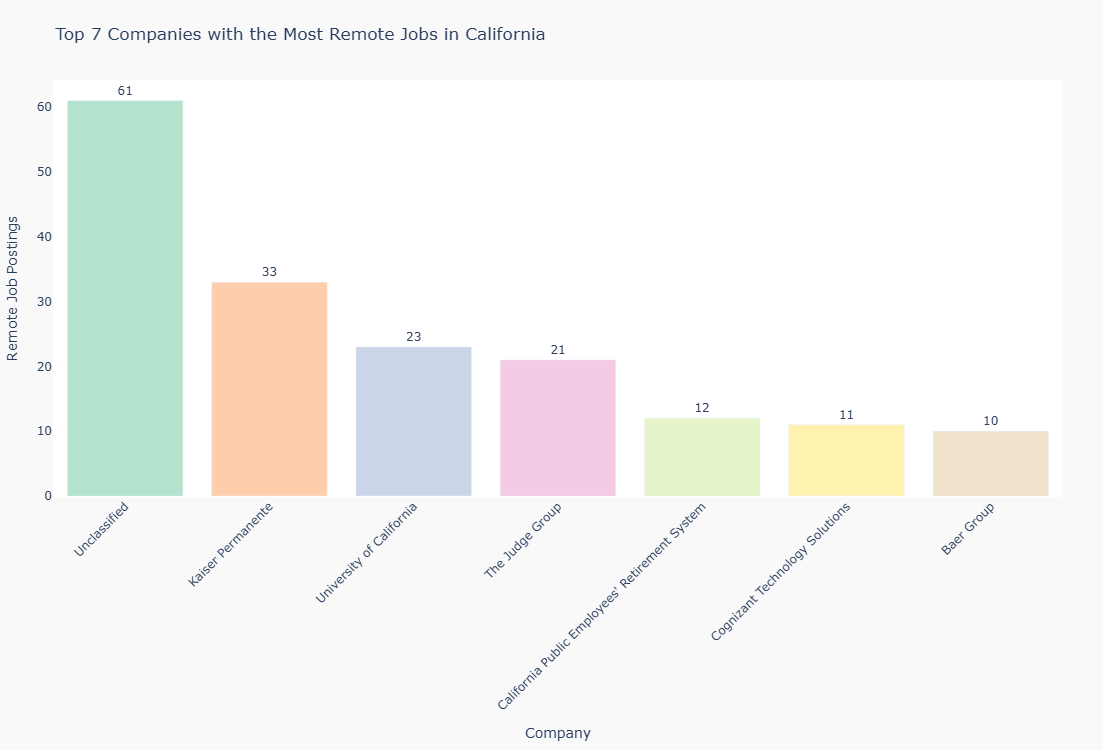

In [57]:
fig_02 = px.bar(
    df_remote_ca,
    x="company_name",
    y="remote_jobs",
    text="remote_jobs",
    title="Top 7 Companies with the Most Remote Jobs in California",
    labels={
        "company_name": "Company",
        "remote_jobs": "Remote Job Postings"
    },
    color="company_name", 
    color_discrete_sequence=px.colors.qualitative.Pastel2,
    height=750
)

fig_02.update_layout(
    showlegend=False,
    xaxis_tickangle=-45,
    xaxis_title="Company",
    yaxis_title="Remote Job Postings",
    paper_bgcolor="#F9F9F9",
    plot_bgcolor="#FFFFFF",
    margin=dict(l=40, r=40, t=80, b=100)
)

fig_02.update_traces(textposition='outside')
fig_02.show()

*__query 3__*

In [58]:
query_03 = """
SELECT 
    j.POSTED,
    l.STATE_NAME
FROM job_postings j
JOIN locations l ON j.LOCATION_ID = l.LOCATION_ID
WHERE l.STATE_NAME = 'California'
  AND j.POSTED IS NOT NULL
"""
df_posted = con.execute(query_03).df()

In [59]:
df_posted["POSTED"] = pd.to_datetime(df_posted["POSTED"], format="%m/%d/%Y", errors="coerce")

In [60]:
df_posted = df_posted.dropna(subset=["POSTED"])

df_posted["year"] = df_posted["POSTED"].dt.year
df_posted["month"] = df_posted["POSTED"].dt.month
df_posted["date"] = df_posted["POSTED"].dt.to_period("M").dt.to_timestamp()

df_monthly = (
    df_posted
    .groupby(["year", "month", "date"])
    .size()
    .reset_index(name="job_count")
    .sort_values("date")
)

In [61]:
df_monthly_sorted = df_monthly.sort_values("date").reset_index(drop=True)

x_numeric = np.arange(len(df_monthly_sorted))
y = df_monthly_sorted["job_count"].values

z = np.polyfit(x_numeric, y, 1)
p = np.poly1d(z)

print("Trendline Y values:", p(x_numeric))

Trendline Y values: [1334.2 1355.6 1377.  1398.4 1419.8]


In [62]:
tickvals = pd.date_range("2024-05-01", "2024-09-01", freq="MS")
ticktext = tickvals.strftime("%B") 

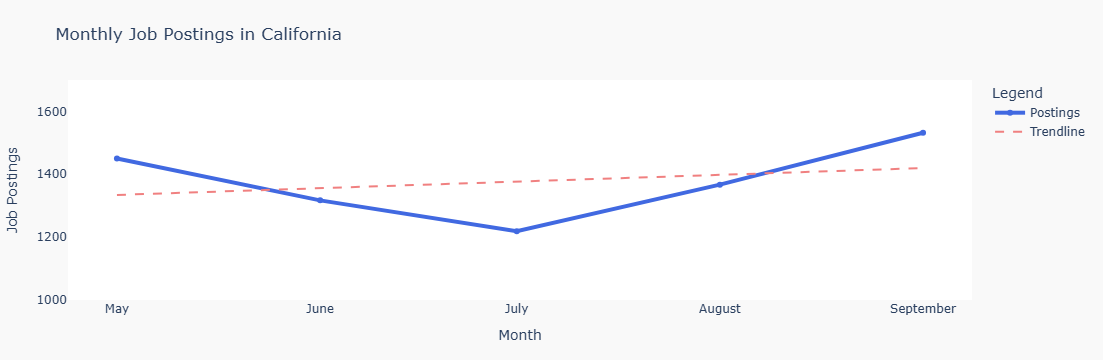

In [63]:
fig_03 = go.Figure()

fig_03.add_trace(go.Scatter(
    x=df_monthly_sorted["date"],
    y=df_monthly_sorted["job_count"],
    mode="lines+markers",
    name="Postings", 
    line=dict(color="royalblue", width=4),
    marker=dict(size=6)
))

fig_03.add_trace(go.Scatter(
    x=df_monthly_sorted["date"],
    y=p(x_numeric),  # Predicted trendline values
    mode="lines",
    name="Trendline",
    line=dict(color="lightcoral", dash="dash", width=2)
))

fig_03.update_layout(
    title="Monthly Job Postings in California",
    xaxis_title="Month",
    yaxis_title="Job Postings",
    yaxis=dict(range=[1000, 1700]),
    xaxis=dict(
        tickmode="array",
        tickvals=tickvals,
        ticktext=ticktext
    ),
    paper_bgcolor="#F9F9F9",
    plot_bgcolor="#FFFFFF",
    margin=dict(l=40, r=40, t=80, b=60),
    legend_title_text="Legend"
)

fig_03.show()


*__query 04__*

In [64]:
msa_map = {
    14460: "Boston",
    47900: "Washington DC",
    35620: "New York",
    41860: "San Francisco",
    42660: "Seattle",
    31080: "Los Angeles",
    19100: "Dallas",
    26420: "Houston",
    12420: "Austin",
    34980: "Nashville",
    28140: "Kansas City",
    19740: "Denver"
}
msa_codes_str = ",".join(str(code) for code in msa_map.keys())  # '14460,47900,...'

In [65]:
query_04 = f"""
SELECT 
    l.MSA,
    ROUND(AVG(j.SALARY), -2) AS avg_salary,
    COUNT(*) AS job_count
FROM job_postings j
JOIN locations l ON j.LOCATION_ID = l.LOCATION_ID
WHERE j.SALARY IS NOT NULL
  AND j.SALARY > 0
  AND l.MSA IN ({msa_codes_str})
GROUP BY l.MSA
ORDER BY avg_salary DESC
"""
df_cities = con.execute(query_04).df()

In [66]:
df_cities["City"] = df_cities["MSA"].map(msa_map)
df_cities = df_cities.sort_values("avg_salary", ascending=False)

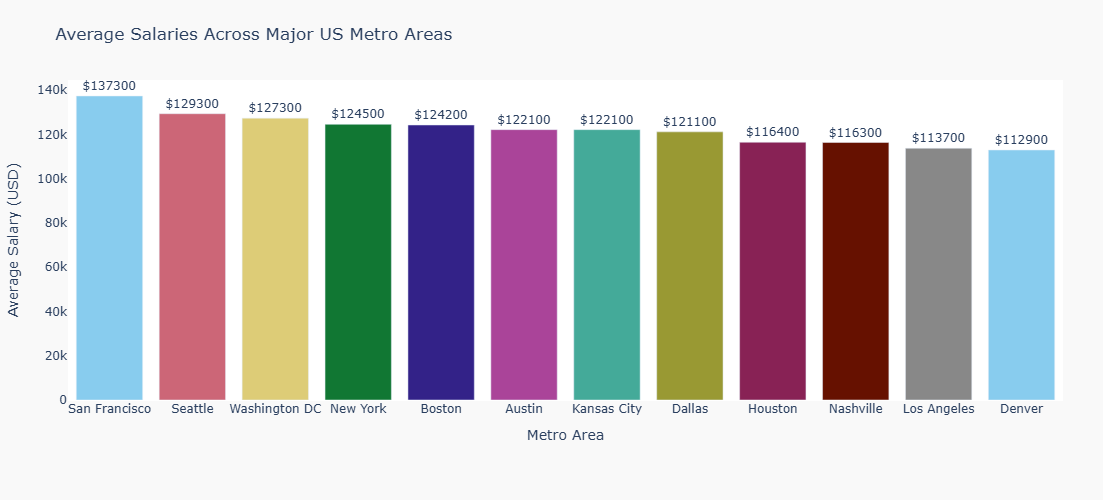

In [67]:
fig_04 = px.bar(
    df_cities,
    x="City",
    y="avg_salary",
    text="avg_salary",
    title="Average Salaries Across Major US Metro Areas",
    labels={"avg_salary": "Average Salary (USD)", "City": "Metro Area"},
    color="City",
    color_discrete_sequence=px.colors.qualitative.Safe,
    height=500
)

fig_04.update_traces(texttemplate='$%{text}', textposition="outside")

fig_04.update_layout(
    showlegend=False,
    yaxis_title="Average Salary (USD)",
    xaxis_title="Metro Area",
    paper_bgcolor="#F9F9F9",
    plot_bgcolor="#FFFFFF",
    margin=dict(l=40, r=40, t=80, b=100)
)

fig_04.show()

*__save figures__*

In [68]:
os.makedirs("plots", exist_ok=True)

In [69]:
fig_01.write_html("plots/fig_01_salary_by_occupation.html")
fig_02.write_html("plots/fig_02_remote_jobs_ca.html")
fig_03.write_html("plots/fig_03_monthly_trends_ca.html")
fig_04.write_html("plots/fig_04_salary_by_city.html")

In [70]:
con.close()